In [22]:
%load_ext dotenv
%dotenv
from fastai.vision.all import *
from torch.utils.data import WeightedRandomSampler

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


# Set up DataLoader

In [23]:
from fastai.vision.all import *

path = Path("imgs/train/")
# Create the DataBlock without the additional images
dataloader = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, min_scale=0.75),
).dataloaders(path)


In [24]:
[i for i in dataloader.train_ds.items if "best" in i.name]

[Path('imgs/train/pooping/1666_best.jpeg'),
 Path('imgs/train/pooping/1667_best.jpeg')]

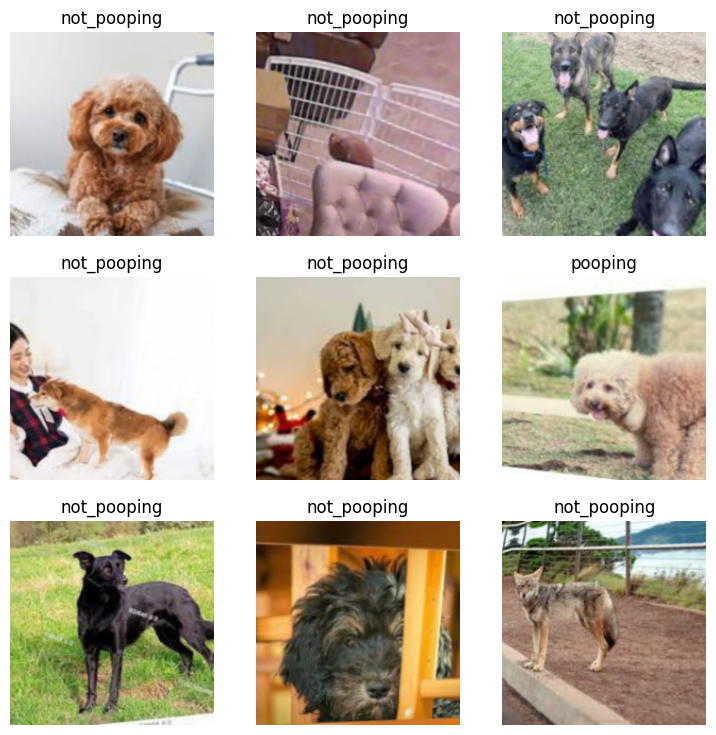

In [25]:
dataloader.show_batch()

# Train and export model

In [26]:
#Create learner, train and save model file
learn = vision_learner(dataloader, resnet34, metrics=accuracy)
learn.fine_tune(9)
learn.export("dog_be_pooping.pkl")

/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Run predictions on test imgs

('pooping', tensor(1), tensor([3.6304e-10, 1.0000e+00]))


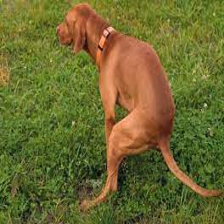

('not_pooping', tensor(0), tensor([0.9292, 0.0708]))


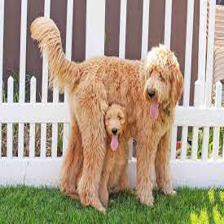

('pooping', tensor(1), tensor([0.0033, 0.9967]))


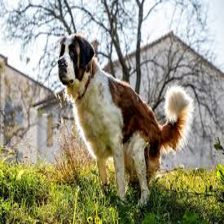

('pooping', tensor(1), tensor([2.4259e-18, 1.0000e+00]))


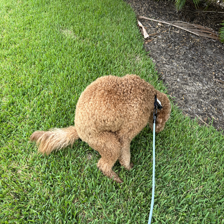

('not_pooping', tensor(0), tensor([9.9999e-01, 8.6448e-06]))


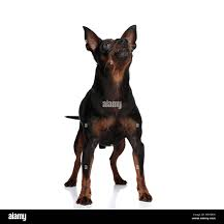

('not_pooping', tensor(0), tensor([0.9953, 0.0047]))


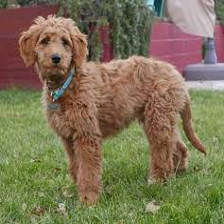

('pooping', tensor(1), tensor([1.7271e-12, 1.0000e+00]))


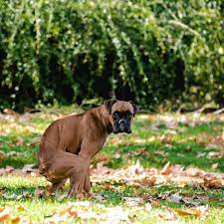

('pooping', tensor(1), tensor([1.5795e-16, 1.0000e+00]))


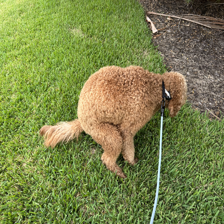

('pooping', tensor(1), tensor([0.0874, 0.9126]))


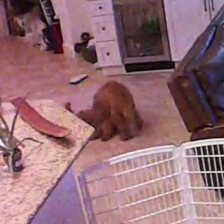

('pooping', tensor(1), tensor([3.8622e-11, 1.0000e+00]))


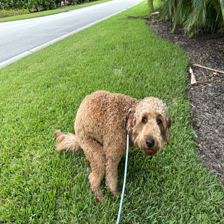

('pooping', tensor(1), tensor([5.6858e-14, 1.0000e+00]))


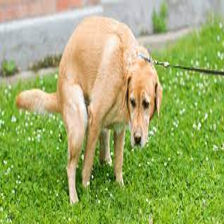

('pooping', tensor(1), tensor([9.0958e-10, 1.0000e+00]))


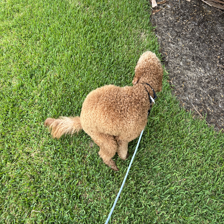

('pooping', tensor(1), tensor([1.7787e-05, 9.9998e-01]))


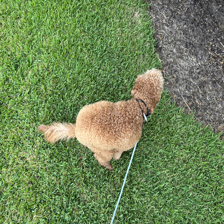

('pooping', tensor(1), tensor([1.4148e-14, 1.0000e+00]))


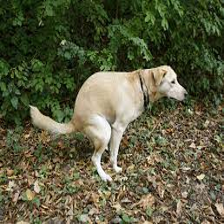

('not_pooping', tensor(0), tensor([0.9845, 0.0155]))


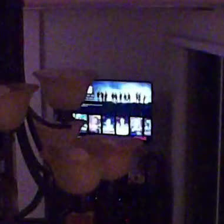

('not_pooping', tensor(0), tensor([9.9997e-01, 2.8095e-05]))


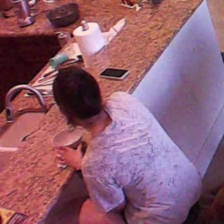

('not_pooping', tensor(0), tensor([0.9963, 0.0037]))


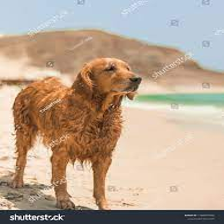

('pooping', tensor(1), tensor([5.5677e-14, 1.0000e+00]))


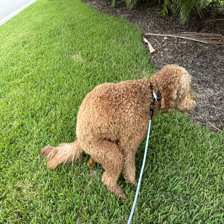

('not_pooping', tensor(0), tensor([9.9992e-01, 7.9408e-05]))


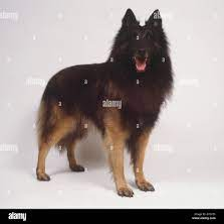

('pooping', tensor(1), tensor([2.7631e-17, 1.0000e+00]))


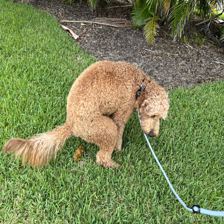

('pooping', tensor(1), tensor([2.1790e-10, 1.0000e+00]))


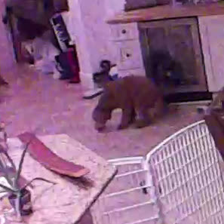

('pooping', tensor(1), tensor([4.2534e-08, 1.0000e+00]))


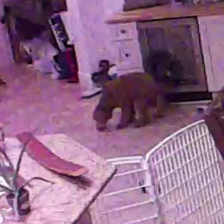

('not_pooping', tensor(0), tensor([9.9981e-01, 1.8618e-04]))


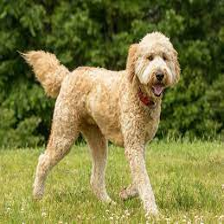

In [27]:
import PIL
import os
img_dir = "imgs/test"
for img in os.listdir(img_dir):
    if not img.endswith(".jpeg"):
        continue
    img = PIL.Image.open(os.path.join(img_dir, img))
    img = img.resize((224, 224))
    prediction = learn.predict(img)
    print(prediction)
    display(img)